<a href="https://colab.research.google.com/github/SanduDS/Research_Protien_Classification/blob/master/Non_hierarchical_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) A google drive connection  is estabished to be used for saving the model and results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%load_ext tensorboard

2)The model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000, 21)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1000, 250)    42250       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1000, 250)    63250       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 1000, 250)    84250       input_1[0][0]                    
______________________________________________________________________________________________

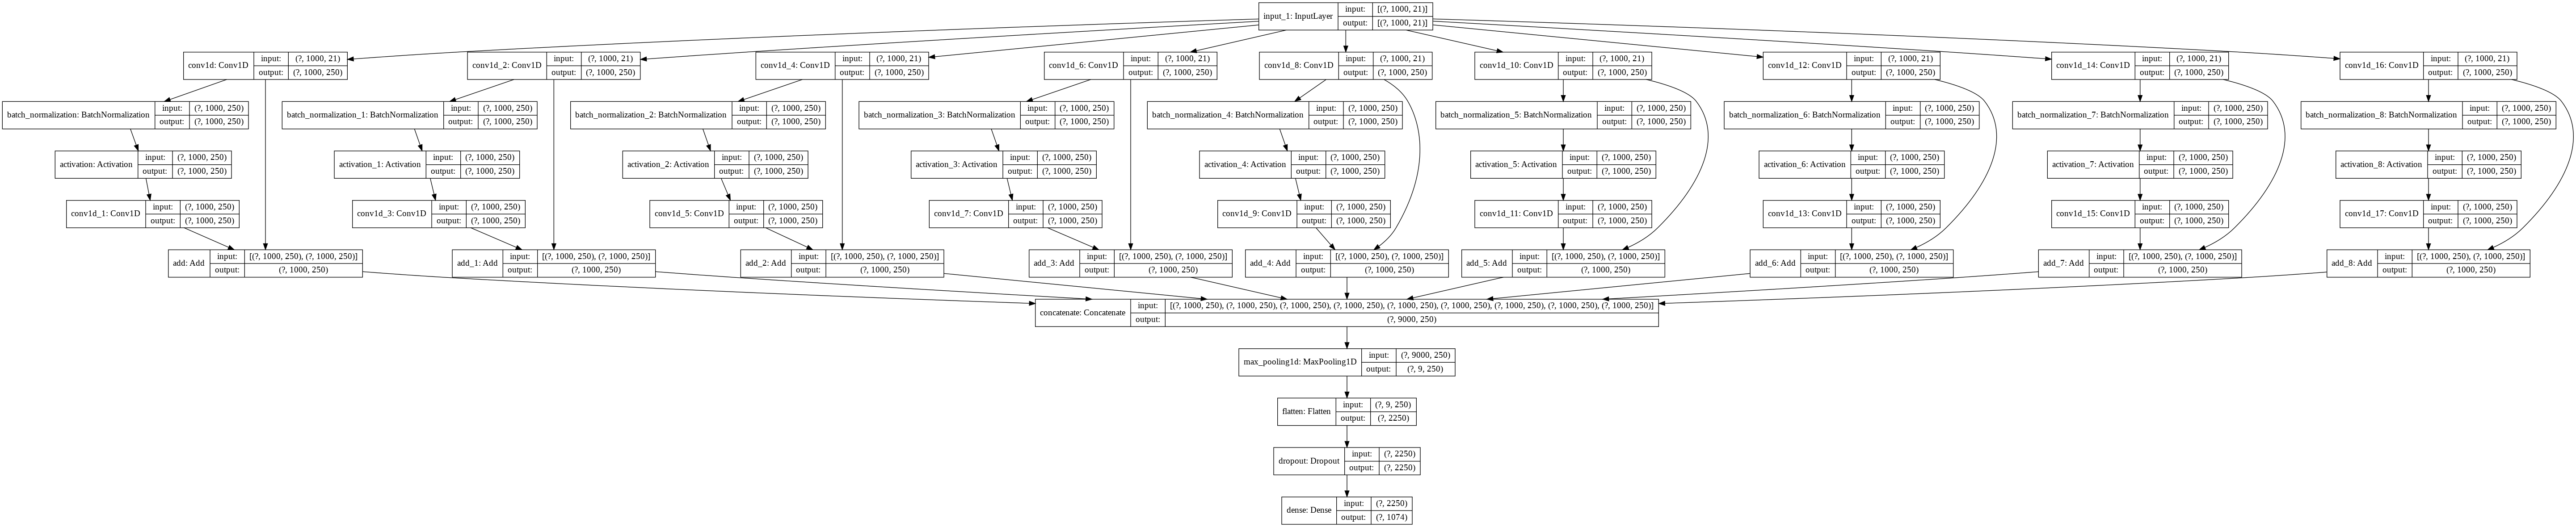

In [ ]:
# tensorboard is used to results' analysis 
%reload_ext tensorboard 
#Importing necessary packages
import tensorflow as tf
from tensorflow.keras.layers import Dense,Add,AveragePooling1D, Activation,Conv1D,MaxPool1D,GlobalAveragePooling1D,Dropout,Flatten,concatenate,Input,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
#Input layer for tensroflow 1D layers
x_input = Input(shape=(1000, 21))
a=x_input
#number of filters
n=250
#BLOCK 01--Start
b01 = Conv1D(filters=n,padding='same', kernel_size=(8),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
b0=BatchNormalization()(b01)
b0= Activation('relu')(b0)
b011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(b0)
b3=Add()([b01,b011])
#BLOCK 01--End

#BLOCK 02--Start
c01 = Conv1D(filters=n,padding='same', kernel_size=(12),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
c0=BatchNormalization()(c01)
c0= Activation('relu')(c0)
c011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(c0)
c3=Add()([c01,c011])
#BLOCK 02--End

#BLOCK 03--Start
d01 = Conv1D(filters=n,padding='same', kernel_size=(16),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
d0=BatchNormalization()(d01)
d0= Activation('relu')(d0)
d011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(d0)
d3=Add()([d01,d011])
#BLOCK 03--End

#BLOCK 04--Start
e01 = Conv1D(filters=n,padding='same', kernel_size=(20),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
e0=BatchNormalization()(e01)
e0= Activation('relu')(e0)
e011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(e0)
e3=Add()([e01,e011])
#BLOCK 04--End

#BLOCK 05--Start
f01 = Conv1D(filters=n,padding='same', kernel_size=(24),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
f0=BatchNormalization()(f01)
f0= Activation('relu')(f0)
f011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(f0)
f3=Add()([f01,f011])
#BLOCK 05--End

#BLOCK 06--Start
g01 = Conv1D(filters=n,padding='same', kernel_size=(28),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
g0=BatchNormalization()(g01)
g0= Activation('relu')(g0)
g011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(g0)
g3=Add()([g01,g011])
#BLOCK 06--End

#BLOCK 07--Start
h01 = Conv1D(filters=n,padding='same', kernel_size=(32),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
h0=BatchNormalization()(h01)
h0= Activation('relu')(h0)
h011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(h0)
h3=Add()([h01,h011])
#BLOCK 07--End

#BLOCK 08--Start
i01 = Conv1D(filters=n,padding='same', kernel_size=(36),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
i0=BatchNormalization()(i01)
i0= Activation('relu')(i0)
i011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(i0)
i3=Add()([i01,i011])
#BLOCK 08--End

#BLOCK 09--Start
j01 = Conv1D(filters=n,padding='same', kernel_size=(40),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(a)
j0=BatchNormalization()(j01)
j0= Activation('relu')(j0)
j011 = Conv1D(filters=n,padding='same', kernel_size=(4),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(j0)
j3=Add()([j01,j011])
#BLOCK 09--End

#Concatenation of all 9 Blocks
model=concatenate([b3,c3,d3,e3,f3,g3,h3,i3,j3],1)

#Downsampling
model=MaxPool1D(1000,strides=1000)(model)

#Flattening the feauter maps to be input for classification.
model=Flatten()(model)

#To avoid overfiting
model = Dropout(0.5)(model)

#Output Layer
model = Dense(1074,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.0001))(model)

model = Model(x_input, model)

#output model details
print(model.summary())

plot_model(model, to_file='model.png',show_shapes=True)


3)A drive connection to dataset for downloading

In [ ]:
# Code to read drive file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

4)Datasets downloanding

In [ ]:
#Set00(Links for the datasets Training and validation: CrossValidation set00 -COG families 1074)
linkDataSet='https://drive.google.com/open?id=137fHYetPaVUyC_nDaThdvC0y_XxoKHgM'
linkTestset='https://drive.google.com/open?id=1QFwNvKNfZuz-z_SKqfbM0dTgdduaf8H7'

fluff1, id1 = linkDataSet.split('=')
fluff2, id2 = linkTestset.split('=')
print (id1) # Verify that you have everything after '='
print (id2) # Verify that you have everything after '='
print('downloading train data set')
downloadedData= drive.CreateFile({'id':id1}) 
downloadedData.GetContentFile('train.txt') 
print('downloading test data set')
downloadedTestData= drive.CreateFile({'id':id2}) 
downloadedTestData.GetContentFile('test.txt') 

5)Dataset Reading

In [ ]:
print("Read train raw file start" )
rawDataset = []
rawDatasetLabel = []
rawTestDataset=[]
rawTestDatasetLabel=[]

with open( 'train.txt', 'r') as tr:
  for row in tr.readlines():
    (label, seq) = row.strip().split("\t")
    seqlen = len(seq)

    if (seqlen != 1000):
      raise Exception("SEQLEN is different from input data (%d / %d)"
      % (seqlen, 1000))

    rawDataset.append(seq)
    rawDatasetLabel.append(label)
print("Read train raw file end" )  
print("Read test raw file start" )
with open( 'test.txt', 'r') as tr:
  for row in tr.readlines():
    (label, seq) = row.strip().split("\t")
    seqlen = len(seq)

    if (seqlen != 1000):
      raise Exception("SEQLEN is different from input data (%d / %d)"
      % (seqlen, 1000))

    rawTestDataset.append(seq)
    rawTestDatasetLabel.append(label)
print("Read test raw file end" )      


6) Data sample Endocing Functions

In [ ]:
import numpy as np
import glob
import h5py
import numpy as np
import cv2
import math
import random

 
## ######################## ##
#
#  Define CHARSET, CHARLEN
#
## ######################## ## 
CHARSET = { 'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, \
            'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, \
            'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19, 'X': 20, \
            'O': 20, 'U': 20,
            'B': (2, 11),
            'Z': (3, 13),
            'J': (7, 9) }
CHARLEN = 21

## ######################## ##
#
#  Encoding Helpers
#
## ######################## ## 
# sequnce endoing
#
def encoding_seq_np( seq, arr):
  for i, c in enumerate(seq):
    if c == "_":
      # let them zero
      continue
    elif isinstance(CHARSET[ c ], int):
      idx = CHARSET[ c ]
      arr[ i ][idx] = 1
    else:
      idx1 = CHARSET[ c ][0]
      idx2 = CHARSET[ c ][1]
      arr[i][ idx1 ] = 0.5
      arr[i][ idx2 ] = 0.5
      # raise Exception("notreachhere")

#Label encoding
def encoding_label_np( l, arr):
  arr[ int(l) ] = 1


7) Code for input large dataset as batches by spliting

In [ ]:
class MyGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, ids, train_dir):
        'Initialization'
        self.ids = ids
        self.train_dir = train_dir
        

    def __len__(self):
        'Denotes the number of batches per epoch'
        batch_size=100
        numofBatchs=math.ceil(len(self.train_dir) / batch_size)
        return numofBatchs

    def __getitem__(self, index):
      
      test_resL=[]
      test_resD=[]
      start_posT = index * 100
      end_posT = min(start_posT + 100, len(self.train_dir))
      test_resL=self.ids[start_posT:end_posT]
      test_resD=self.train_dir[start_posT:end_posT]
      #iTest += 1
      
      isize=len(test_resL)
        

      dataTest = np.zeros( (isize,1000,21), dtype=np.float32 )
      labelsTest = np.zeros( (isize,1074), dtype=np.uint8 )    
      #rawTest = []

      for i , idy in enumerate(test_resL):
          label=idy
          #print(label)        
          encoding_label_np(label, labelsTest[i] )
      for i , idx in enumerate(test_resD):
          seq=idx        
          encoding_seq_np(seq, dataTest[i] )
      #dataShped=np.reshape(dataTest,(-1, 1, 1000, 21))
      # print(dataTest[0:2])
      # print(labelsTest[0:2])                
      return dataTest,labelsTest
    def on_epoch_end(self):
      c = list(zip(self.ids, self.train_dir))
      random.shuffle(c)
      self.ids,self.train_dir= zip(*c)
          

8) fitting and validation

In [ ]:
#Training testing set 00

##To save CustomModelCheckpoint in the location given
class CustomModelCheckpoint(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
     self.model.save('/content/drive/My Drive/Test1/1074/set00/FinalCOG1074_00.h5', overwrite=True)

cbk = CustomModelCheckpoint()

##  weight optimizer
myadam=tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#Compiling model with metrices
import tensorflow.keras.metrics as tm
model.compile(loss='categorical_crossentropy',
                optimizer=myadam, metrics=['accuracy',tm.Precision(),tm.Recall(),tm.AUC(),tm.FalseNegatives(),tm.FalsePositives(),tm.TrueNegatives(),tm.TruePositives()])

EPOCHS =20
#Log files
%mkdir '/content/drive/My Drive/Test1/1074/set00/logs'
logdir='/content/drive/My Drive/Test1/1074/set00/logs'

#batches handlers
training_generator =MyGenerator(rawDatasetLabel,rawDataset)
testing_generator=MyGenerator(rawTestDatasetLabel,rawTestDataset)

#Tensorboard usage
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

#Early stopping with patience 1
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,mode='min',patience=1)
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Test1/1074/set00/FinalCOG2892imrve.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#learning rate changes
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',verbose=1, factor=0.2,patience=1, min_lr=0.0001)

#Fiting the model and validation 
history = model.fit(training_generator,
                      epochs=EPOCHS,
                      verbose=1,
                      validation_data=testing_generator,callbacks=[cbk,tensorboard_callback,es,mc])


